#Unzipping


In [ ]:
#!unzip '/content/drive/MyDrive/Colab Notebooks/Flowers-Dataset.zip'

#Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_gen = ImageDataGenerator(rescale=1./255,
                               zoom_range=0.2,
                               horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
xtrain = train_gen.flow_from_directory('/content/flowers',
                                       target_size=(64,64),
                                       class_mode='categorical',
                                       batch_size=100)

Found 4317 images belonging to 5 classes.


# Create Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(5,activation='softmax'))

# Compile Model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy',
                        patience=3)
reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

# Fit Model

In [ ]:
model.fit_generator(xtrain,
                    steps_per_epoch = len(xtrain),
                    callbacks=callback,
                    epochs=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
44/44 [==============================] - 31s 703ms/step - loss: 0.6074 - accuracy: 0.7751 - lr: 0.0010
Epoch 2/100
44/44 [==============================] - 31s 702ms/step - loss: 0.5491 - accuracy: 0.7973 - lr: 0.0010
Epoch 3/100
44/44 [==============================] - 31s 696ms/step - loss: 0.5417 - accuracy: 0.8043 - lr: 0.0010
Epoch 4/100
44/44 [==============================] - 31s 693ms/step - loss: 0.4930 - accuracy: 0.8156 - lr: 0.0010
Epoch 5/100
44/44 [==============================] - 31s 692ms/step - loss: 0.4616 - accuracy: 0.8293 - lr: 0.0010
Epoch 6/100
44/44 [==============================] - 31s 695ms/step - loss: 0.4350 - accuracy: 0.8392 - lr: 0.0010
Epoch 7/100
44/44 [==============================] - 31s 700ms/step - loss: 0.4190 - accuracy: 0.8469 - lr: 0.0010
Epoch 8/100
44/44 [==============================] - 31s 692ms/step - loss: 0.3975 - accuracy: 0.8568 - lr: 0.0010
Epoch 9/100
44/44 [==============================] - 31s 689ms/step - loss: 0.42

# Save Model

In [ ]:
model.save('flower_cnn.h5')


#Test

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

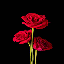

In [ ]:
img = image.load_img('/content/test image.jpg',target_size=(64,64))
img

In [ ]:
h = image.img_to_array(img)
h

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [ ]:
h= np.expand_dims(h,axis= 0)
h

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

In [ ]:
val = list(xtrain.class_indices.keys())
val

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
val[np.argmax(model.predict(h))]

'rose'